In [7]:
from pathlib import Path
from PIL import Image, ImageFont, ImageDraw
import pandas as pd

In [3]:
ROOT_PATH = Path().absolute().parent
ROOT_PATH

PosixPath('/Users/ingridturkerud/Desktop/TDT4900-Master-Thesis')

In [4]:
save_path = ROOT_PATH.joinpath('notebooks', 'visuals')

In [6]:
image_path = ROOT_PATH.parents[1].joinpath('Downloads', 'val2014')  # MS COCO validation images
image_path

PosixPath('/Users/ingridturkerud/Downloads/val2014')

In [8]:
result_file = ROOT_PATH.joinpath('data', 'processed', 'TEST_sample_1234.csv')

In [10]:
res_df = pd.read_csv(result_file)
res_df

,model_name,model_type,dataset,image_id,image_name,caption
0,basic_08-May-2020_(22:16:18),basic,coco,22223,COCO_val2014_000000233968.jpg,a group of young men playing a game of soccer
1,basic_08-May-2020_(22:16:18),basic,coco,20041,COCO_val2014_000000248774.jpg,a horse is standing in a field with a dog
2,basic_08-May-2020_(22:16:18),basic,coco,9855,COCO_val2014_000000549261.jpg,a man is standing in front of a bunch of bananas
3,basic_08-May-2020_(22:16:18),basic,coco,12418,COCO_val2014_000000141962.jpg,a man riding a motorcycle on a street
4,basic_08-May-2020_(22:16:18),basic,coco,34544,COCO_val2014_000000022213.jpg,a group of people standing around a man holdin...
5,basic_08-May-2020_(22:16:18),basic,coco,19702,COCO_val2014_000000440354.jpg,a fire hydrant is painted green and yellow
6,basic_08-May-2020_(22:16:18),basic,coco,39719,COCO_val2014_000000195086.jpg,a woman is playing a video game on a wii
7,basic_08-May-2020_(22:16:18),basic,coco,26426,COCO_val2014_000000415770.jpg,a woman is playing tennis on a court
8,basic_08-May-2020_(22:16:18),basic,coco,11358,COCO_val2014_000000449879.jpg,a man sitting on a motorcycle in a parking lot
9,basic_08-May-2020_(22:16:18),basic,coco,1131,COCO_val2014_000000540806.jpg,a man riding a motorcycle with a woman on back...


In [12]:
b_df = res_df.loc[res_df.loc[:, 'model_type']=='basic',:]
a_df = res_df.loc[res_df.loc[:, 'model_type']=='adaptive',:]

In [14]:
images_df = res_df.loc[:, ['image_id', 'image_name']].drop_duplicates(ignore_index=True)

In [58]:
def text_wrap(text, font, max_width):
    lines = []
    # If the width of the text is smaller than image width
    # we don't need to split it, just add it to the lines array
    # and return
    if font.getsize(text)[0] <= max_width:
        lines.append(text) 
    else:
        # split the line by spaces to get words
        words = text.split(' ')  
        i = 0
        # append every word to a line while its width is shorter than image width
        while i < len(words):
            line = ''         
            while i < len(words) and font.getsize(line + words[i])[0] <= max_width:                
                line = line + words[i] + " "
                i += 1
            if not line:
                line = words[i]
                i += 1
            # when the line gets longer than the max width do not append the word, 
            # add the line to the lines array
            lines.append(line)    
    return lines

In [62]:
def add_captions(image, cap1, cap2, save_name, gt=None, fontsize=20, offset=35):
    width, height = image.size

    new_img = Image.new('RGBA', (width+10, height+(offset*6)), 'white')
    new_img.paste(image, (5, 5, width+5, height+5))
    
    draw = ImageDraw.Draw(new_img)
    font = ImageFont.truetype("Arial.ttf", fontsize)
    
    # add captions
    current_height = height + 15
    cap1_lines = text_wrap(cap1, font, width - 30)
    cap2_lines = text_wrap(cap2, font, width - 30)
    for cap_lines in [cap1_lines, cap2_lines]:
        for line in cap_lines:
            draw.text((20, current_height), line, font=font, fill='#000000')
            current_height += offset
    
    if gt:
        draw.text((20, height+15+offset*2), gt, font=font, fill='#000000')
    # save new image
    new_img.save(save_path.joinpath(save_name))
    return new_img

In [63]:
imgs = []
for i in range(len(images_df)):
    image_id, image_name = images_df.loc[i, ['image_id', 'image_name']]
    im = Image.open(image_path.joinpath(image_name))
    b_caption = "B: " + b_df.loc[b_df.loc[:, 'image_id']==image_id, 'caption'].reset_index(drop=True).loc[0]
    a_caption = "A: " + a_df.loc[a_df.loc[:, 'image_id']==image_id, 'caption'].reset_index(drop=True).loc[0]
    
    imgs.append(add_captions(im, a_caption, b_caption, "img_cap_" + str(image_id) + ".png"))
    
    
    
    

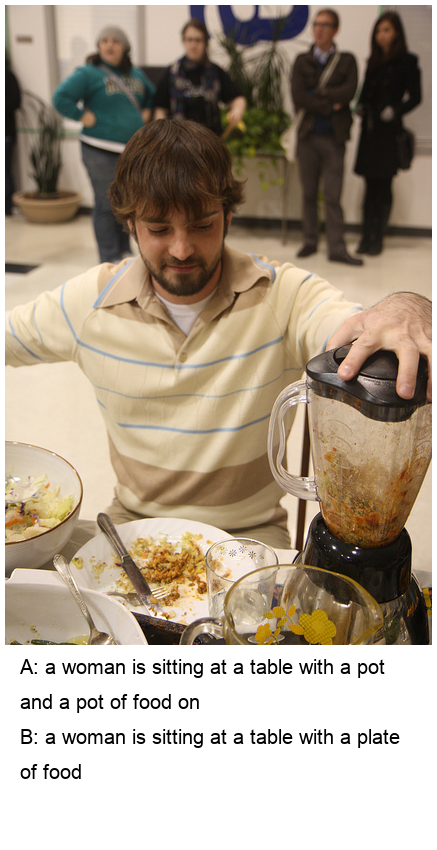

In [102]:
imgs[19]